In [1]:
using Pkg
using UnPack
import Roots: fzero#Be careful. Roots has two solve methods.
using Plots
using Test
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/github/CHEM-5555/Numerical Solutions to Differential Equations`


In [2]:
include("JDE_ODE_Base.jl")
using .JDE_ODE_Base
import .JDE_ODE_Base: step

In [ ]:
#Method implementation for Forward Euler

struct ForwardEuler <: ODEIntegrator end
function step(problem::ODEProblem, ::ForwardEuler, yₙ::Float64, tₙ::Float64)
    @unpack f, h = problem
    return yₙ + h*f(yₙ,tₙ)
end

#Method implementation for Backward Euler
struct BackwardEuler <: ODEIntegrator end
function step(problem::ODEProblem,::BackwardEuler, yₙ::Float64, tₙ::Float64)
    #Implement the Backward Euler method.
    @unpack f, h = problem
    g(y) = y - yₙ - h*f(y,tₙ+h)
    return fzero(g, yₙ + h*f(yₙ,tₙ))
end

step (generic function with 2 methods)

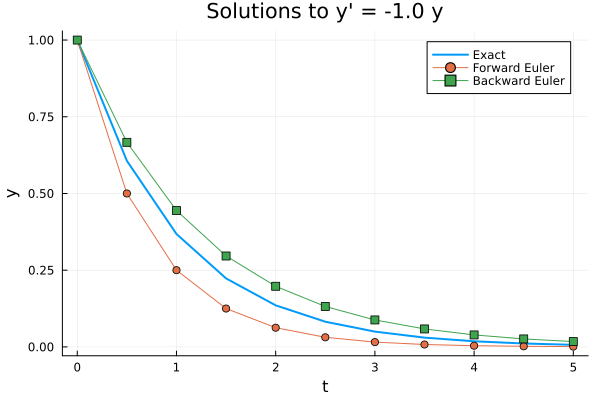

In [19]:
#Plot forward and backward Euler solutions for 
#both y' = y and y' = -y.

function show_plots(sign::Float64=-1.0)
    f(y, t) = sign * y  # y' = y
    y₀ = 1.0
    T = 5.0
    h = 0.5
    tspan = 0:h:T
    exact_sol(t) = y₀ * exp(sign * t)

    # Create the ODE problem
    problem = ODEProblem(f, y₀, T, h)

    forward = solve(problem, ForwardEuler())
    backward = solve(problem, BackwardEuler())

    # Plot solutions
    legend_ = (sign > 0) ? :topleft : :topright
    plot(tspan, exact_sol.(tspan), label="Exact", linewidth=2, legend=legend_)
    plot!(tspan, forward.y, label="Forward Euler", marker=:circle)
    plot!(tspan, backward.y, label="Backward Euler", marker=:square)
    xlabel!("t")
    ylabel!("y")
    title!("Solutions to y' = $sign y")
end

show_plots()

The backward Euler method is ''absolutely stable'' or 'A-stable' according to the applied math community. Here you can see that the term "A-stable" is very misleading--it is not stable for y' = y.

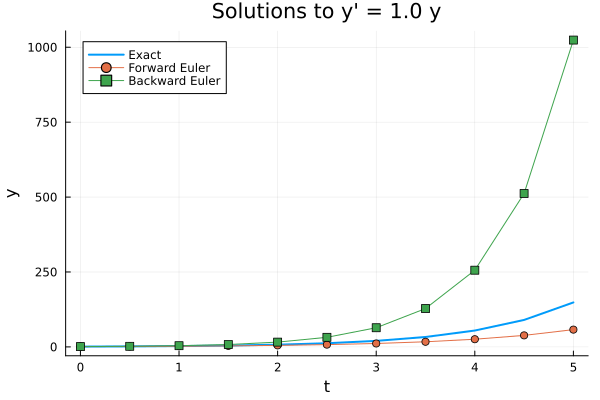

In [20]:
show_plots(1.0)

In [40]:
#Test your forward and backward Euler methods.

# Test that both approaches give the same results
@testset "Forward Euler Implementation Comparison" begin
    # Test parameters
    y₀ = 0.0
    T = 5.0
    h = 0.5
    f(y,t) = 1.0
    exact = collect(0.0:h:T)#This is the exact solution, a straight line of slope 1 that passes through the origin.
    problem = ODEProblem(f, y₀, T, h)
    # Get solution using function-based approach
    forward = solve(problem, ForwardEuler())
    backward = solve(problem, BackwardEuler())
    y1, t1 = forward.y, forward.t
    y2, t2 = backward.y, backward.t
    @test length(y1) == length(y2)
    @test length(t1) == length(t2)
    @test all(isapprox.(y1, y2, rtol=1e-10))
    @test all(isapprox.(t1, t2, rtol=1e-10))
    @test all(isapprox.(y1, exact))
end

Test Summary:                           | Pass  Total  Time
Forward Euler Implementation Comparison |    5      5  0.0s


Test.DefaultTestSet("Forward Euler Implementation Comparison", Any[], 5, false, false, true, 1.738008469828266e9, 1.738008469832178e9, false, "/Users/joeleaves/github/CHEM-5555/Numerical Solutions to Differential Equations/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W3sZmlsZQ==.jl")